# 6.4 使用一元逻辑回归实现商品房分类

### 1.任务描述

一组房屋面积的数据如下（16个）:

137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21。

与房屋面积对应的房屋类型如下：

1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0

其中，1表示高档住宅；0表示普通住宅。

要求：

- 创建一元逻辑回归模型
- 使用交叉熵损失函数计算损失，训练模型，得到模型参数
- 绘制Sigmoid曲线
- 使用模型对一个新的商品房（110平方米）进行分类

### 2.知识准备

见教程。

### 3.任务分析

求解思路如下：

- 观察房屋类型可以看出该问题是一个二分类问题，房屋类型分为1类高档住宅和0类普通住宅；
- 当输入一个房屋面积时，先根据模型中的w和b来计算出一个预测值y；
- 把预测值y套入Sigmoid函数计算出一个概率值$\hat{y}$，再根据设计的阈值，来对该概率值$\hat{y}$进行解析；
- 最后得出该样本所属的房屋类型。

### 4.任务实施


执行代码

迭代次数 1 ，损失： 0.8528074 ，准确率： 0.625
迭代次数 2 ，损失： 0.40025944 ，准确率： 0.875
迭代次数 3 ，损失： 0.34150386 ，准确率： 0.8125
迭代次数 4 ，损失： 0.32257143 ，准确率： 0.8125
迭代次数 5 ，损失： 0.31397203 ，准确率： 0.8125
训练后的w： 0.08808256 训练后的b： -1.161462


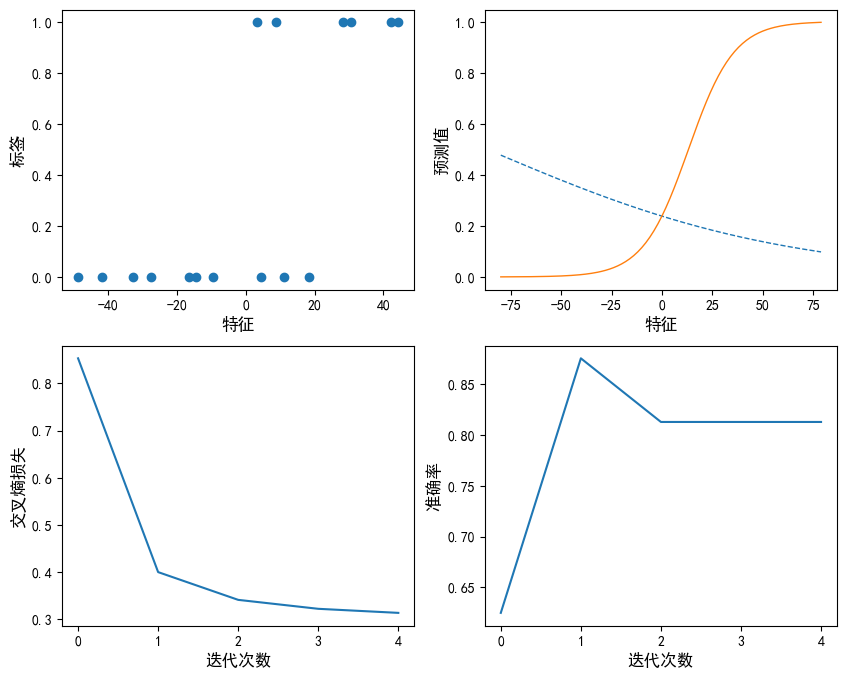

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# 处理中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 1，加载数据
# 房屋面积
x=np.array([137.97,104.50,100.00,126.32,79.20,99.00,124.00,114.00,106.69,140.05,53.75,46.91,68.00,63.02,81.26,86.21])
# 房屋类型（1表示高档住宅，0表示普通住宅）
y=np.array([1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0])
# 2，数据预处理
# 数据中心化，因为Sigmoid函数以0点为中心，将数据从-到+映射到0到1，因此需要进行中心化
# 中心化之后，x_train的值围绕0点分布，经Sigmoid函数映射之后，映射为以0.5为中心的0到1之间的数
x_train=x-np.mean(x)
y_train=y    
# 3，设置超参数
# 学习率
lr=0.005
# 迭代次数
iter=5
# 显示频率
display_step=1
# 初始化模型参数
np.random.seed(612)
w=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())
# 4，训练
# 存放训练集的交叉熵损失
cross_train=[]
# 存放训练集的分类准确率
acc_train=[]
# 可视化
plt.figure(figsize=(10,8))
# 5，绘制样本散点图
plt.subplot(221)
plt.xlabel("特征",fontsize='large')
plt.ylabel("标签",fontsize='large')
plt.scatter(x_train,y_train)
# 6，绘制Sigmoid曲线
plt.subplot(222)
plt.xlabel("特征",fontsize='large')
plt.ylabel("预测值",fontsize='large')
x_=range(-80,80)
y_=1/(1+tf.exp(-(w*x_+b)))
# 7，绘制初始曲线
plt.plot(x_,y_, '--',linewidth=1)
for i in range(iter):
    with tf.GradientTape() as tape:
        # 计算预测值（线性结果使用Sigmoid函数转换）
        pred_train=1/(1+tf.exp(-(w*x_train+b)))
        # 计算交叉熵损失
        Loss_train=-tf.reduce_mean(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))
    # 将损失存入列表
    cross_train.append(Loss_train)        
    # 计算此时的准确率
    Accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.where(pred_train>0.5,1,0),y_train),tf.float32))
    acc_train.append(Accuracy_train)    
    # 求导
    dL_dw,dL_db=tape.gradient(Loss_train,[w,b])
    # 更新参数
    w.assign_sub(lr*dL_dw)
    b.assign_sub(lr*dL_db)
   
    # 打印损失和准确率
    if i % display_step==0:
        print("迭代次数",i + 1,"，损失：",Loss_train.numpy(),"，准确率：", Accuracy_train.numpy())
        
print("训练后的w：",w.numpy(),"训练后的b：",b.numpy())
# 8，输出训练后的Sigmoid曲线
y_=1/(1+tf.exp(-(w*x_+b)))
plt.plot(x_,y_,linewidth=1)

# 9，绘制Loss曲线
plt.subplot(223)
plt.xlabel("迭代次数",fontsize='large')
plt.ylabel("交叉熵损失",fontsize='large')
plt.plot(cross_train)
# 10，绘制准确率
plt.subplot(224)
plt.xlabel("迭代次数",fontsize='large')
plt.ylabel("准确率",fontsize='large')
plt.plot(acc_train)
plt.show()


可见，随着迭代次数增加，交叉熵损失递减，准确率递增。

虚线为w和b是初始值的Sigmoid曲线；实线为w和b是训练后的值的Sigmoid曲线。随着训练次数的增加，输出概率越来越能够反映样本的真实分类。由于两类样本（高档住宅、普通住宅）有一定的交集，所以在这个区域中的点可能会出现分类错误，导致准确率无法达到百分之百。。

In [3]:
# 11，对新房屋进行分类
x_new = 110 - np.mean(x)
# 输出概率
y_new=1/(1+tf.exp(-(w*x_new+b)))
print("对110平方米房屋的预测值：",y_new.numpy())
# 以0.5为阈值，将概率转换成类别
y_new=tf.where(y_new>0.5,1,0)
print("110平方米房屋的类别为：",y_new.numpy())

对110平方米房屋的预测值： 0.5249493
110平方米房屋的类别为： 1


以0.5为阈值，对预测值进行转换，得到类别为1（高档住宅）。